In [10]:
pip install openpyxl --quiet


Note: you may need to restart the kernel to use updated packages.


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
wheat_production_2019 = pd.read_csv('/home/onyxia/work/private-projects/FAOSTAT_data_en_7-25-2024.csv')
crops = pd.read_csv('/home/onyxia/work/private-projects/crops.csv')
country_specs = pd.read_excel('/home/onyxia/work/private-projects/country_specs.xlsx')

In [12]:
# Filter crops data for wheat
crops_wheat = crops[crops['item_name'] == 'Wheat']

# Display the first few rows of the filtered crops data
crops_wheat.head()

,Unnamed: 0,globio_country_code,item_name,item_code,msa_land_use_dynamic,msa_land_use_static,msa_fragmentation_dynamic,msa_fragmentation_static,msa_encroachment_dynamic,msa_encroachment_static,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
0,1,40,Wheat,15,0.000008,0.001838,0,0.000429,0,0.000573,...,0.000009,0.000009,1.684354e-08,1.710999e-08,1.190762e-07,1.271384e-07,0.000000e+00,0.000000e+00,0.000028,0.000000e+00
59,60,56,Wheat,15,0.000004,0.001027,0,0.000096,0,0.000086,...,0.000010,0.000034,2.536948e-08,9.013248e-08,6.098158e-09,2.409022e-08,0.000000e+00,0.000000e+00,0.000004,1.124617e-09
105,106,100,Wheat,15,0.000006,0.001677,0,0.000080,0,0.000259,...,0.000005,0.000008,6.229653e-09,1.560400e-08,9.055939e-07,1.215875e-06,5.277333e-13,2.638667e-12,0.000016,8.280859e-08
187,188,191,Wheat,15,0.000005,0.001500,0,0.000162,0,0.000227,...,0.000005,0.000007,1.032548e-08,1.395820e-08,1.588498e-08,1.645537e-08,0.000000e+00,0.000000e+00,0.000041,0.000000e+00
250,251,196,Wheat,15,0.000010,0.003872,0,0.000373,0,0.000549,...,0.000002,0.000011,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000212,0.000000e+00


In [13]:
# Merge wheat_production_2019 with country_specs
merged_data = pd.merge(wheat_production_2019, country_specs, how='left', left_on='Area Code (M49)', right_on='globio_country_code')

filtered_data = merged_data[merged_data['globio_country_code'].isin(crops_wheat['globio_country_code'])]
filtered_data.head()

final_data = pd.merge(filtered_data, crops_wheat, how='left', left_on='globio_country_code', right_on='globio_country_code')
final_data.head()



,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (CPC),Item,Year Code,Year,...,msa_aquatic_land_use_wetland_static_wm,msa_aquatic_land_use_wetland_static_cut,msa_aquatic_land_use_wetland_dynamic_wm,msa_aquatic_land_use_wetland_dynamic_cut,msa_aquatic_HD_water_withdrawn_static_wm,msa_aquatic_HD_water_withdrawn_static_cut,msa_aquatic_HD_water_withdrawn_dynamic_wm,msa_aquatic_HD_water_withdrawn_dynamic_cut,msa_aquatic_lakes_eutrophication_static,msa_aquatic_lakes_eutrophication_dynamic
0,QCL,Crops and livestock products,40,Austria,5510,Production,111,Wheat,2019,2019,...,0.000009,0.000009,1.684354e-08,1.710999e-08,1.190762e-07,1.271384e-07,0.000000e+00,0.000000e+00,0.000028,0.000000e+00
1,QCL,Crops and livestock products,56,Belgium,5510,Production,111,Wheat,2019,2019,...,0.000010,0.000034,2.536948e-08,9.013248e-08,6.098158e-09,2.409022e-08,0.000000e+00,0.000000e+00,0.000004,1.124617e-09
2,QCL,Crops and livestock products,100,Bulgaria,5510,Production,111,Wheat,2019,2019,...,0.000005,0.000008,6.229653e-09,1.560400e-08,9.055939e-07,1.215875e-06,5.277333e-13,2.638667e-12,0.000016,8.280859e-08
3,QCL,Crops and livestock products,191,Croatia,5510,Production,111,Wheat,2019,2019,...,0.000005,0.000007,1.032548e-08,1.395820e-08,1.588498e-08,1.645537e-08,0.000000e+00,0.000000e+00,0.000041,0.000000e+00
4,QCL,Crops and livestock products,196,Cyprus,5510,Production,111,Wheat,2019,2019,...,0.000002,0.000011,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000212,0.000000e+00


In [14]:
# Identify relevant static loss columns
static_loss_columns = [
    'msa_land_use_static', 
    'msa_aquatic_land_use_river_static_wm', 
    'msa_aquatic_land_use_river_static_cut', 
    'msa_aquatic_land_use_wetland_static_wm', 
    'msa_aquatic_land_use_wetland_static_cut'
]

# Ensure these columns exist in the merged data
final_data.head()
final_data.to_csv('/home/onyxia/work/private-projectsfinal_merged_data.csv', index=False)



In [15]:
# Calculate total static biodiversity loss (MSA.km²)
final_data['biodiversity_loss'] = final_data['Value'] * final_data[static_loss_columns].sum(axis=1)

# Summarize the results by country
biodiversity_loss_by_country = final_data.groupby('Area')[['biodiversity_loss','Value']].sum().reset_index()

# Display the results
biodiversity_loss_by_country.head()

,Area,biodiversity_loss,Value
0,Austria,2973.257557,1596880.0
1,Belgium,2046.693646,1902380.0
2,Bulgaria,10703.065658,6319630.0
3,Croatia,1218.154402,803270.0
4,Cyprus,114.512663,29470.0


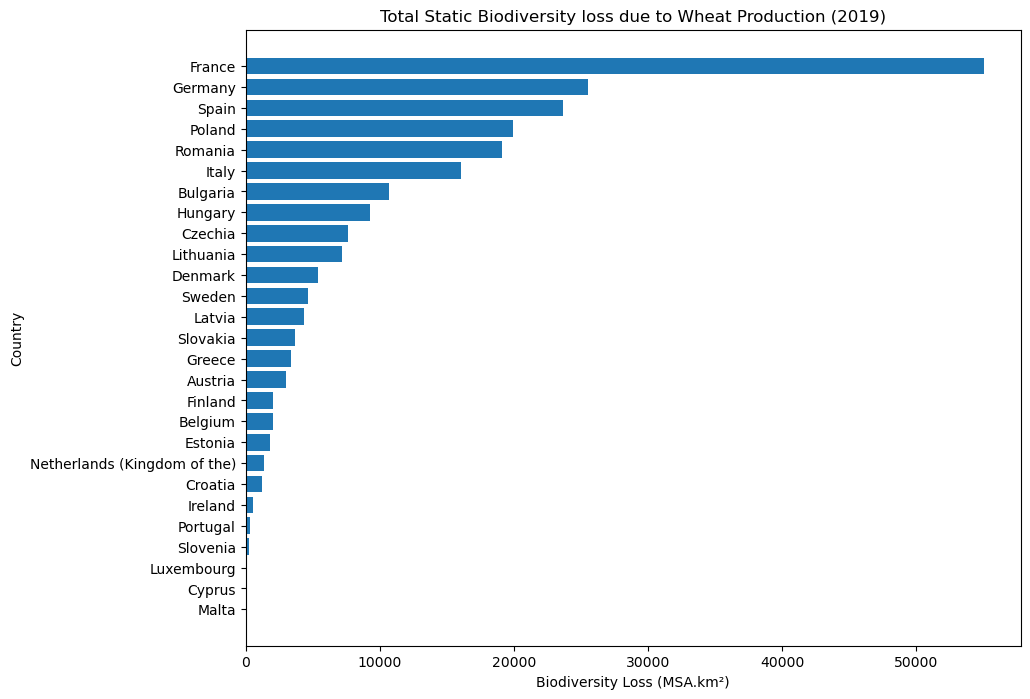

In [16]:
import matplotlib.pyplot as plt

# Plot the biodiversity loss by country
plt.figure(figsize=(10, 8))
biodiversity_loss_by_country = biodiversity_loss_by_country.sort_values(by='biodiversity_loss', ascending=False)
plt.barh(biodiversity_loss_by_country['Area'], biodiversity_loss_by_country['biodiversity_loss'])
plt.xlabel('Biodiversity Loss (MSA.km²)')
plt.ylabel('Country')
plt.title('Total Static Biodiversity loss due to Wheat Production (2019)')
plt.gca().invert_yaxis()
plt.show()

In [17]:
import numpy as np

# Check for missing or infinite values in the dataset
print(final_data[['biodiversity_loss', 'Value'] + static_loss_columns].isnull().sum())
print(np.isinf(final_data[['biodiversity_loss', 'Value'] + static_loss_columns]).sum())

# Replace infinite values with NaN and drop them 
final_data.replace([np.inf, -np.inf], np.nan, inplace=True)
final_data_clean = final_data.dropna(subset=['biodiversity_loss', 'Value'] + static_loss_columns)

# Check that there are no more missing or infinite values
print(final_data_clean[['biodiversity_loss', 'Value'] + static_loss_columns].isnull().sum())
print(np.isinf(final_data_clean[['biodiversity_loss', 'Value'] + static_loss_columns]).sum())


biodiversity_loss                          0
Value                                      0
msa_land_use_static                        0
msa_aquatic_land_use_river_static_wm       1
msa_aquatic_land_use_river_static_cut      1
msa_aquatic_land_use_wetland_static_wm     1
msa_aquatic_land_use_wetland_static_cut    1
dtype: int64
biodiversity_loss                          0
Value                                      0
msa_land_use_static                        0
msa_aquatic_land_use_river_static_wm       0
msa_aquatic_land_use_river_static_cut      0
msa_aquatic_land_use_wetland_static_wm     0
msa_aquatic_land_use_wetland_static_cut    0
dtype: int64
biodiversity_loss                          0
Value                                      0
msa_land_use_static                        0
msa_aquatic_land_use_river_static_wm       0
msa_aquatic_land_use_river_static_cut      0
msa_aquatic_land_use_wetland_static_wm     0
msa_aquatic_land_use_wetland_static_cut    0
dtype: int64
biodiversity_los

/tmp/ipykernel_94789/2741032046.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  final_data.replace([np.inf, -np.inf], np.nan, inplace=True)


In [18]:
import statsmodels.api as sm

# Regression Analysis
X = final_data_clean[['Value'] + static_loss_columns]
X = sm.add_constant(X)
y = final_data_clean['biodiversity_loss']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      biodiversity_loss   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     59.23
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           2.76e-11
Time:                        07:02:03   Log-Likelihood:                -242.15
No. Observations:                  26   AIC:                             498.3
Df Residuals:                      19   BIC:                             507.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [19]:
# Checking how much of the model is explained by production value only
X_value = final_data_clean[['Value']]
X_value = sm.add_constant(X_value)
y = final_data_clean['biodiversity_loss']
model_value_only = sm.OLS(y, X_value).fit()
print(model_value_only.summary())

                            OLS Regression Results                            
Dep. Variable:      biodiversity_loss   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     237.7
Date:                Fri, 26 Jul 2024   Prob (F-statistic):           5.97e-14
Time:                        07:02:03   Log-Likelihood:                -249.84
No. Observations:                  26   AIC:                             503.7
Df Residuals:                      24   BIC:                             506.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1666.3031    869.000      1.917      0.0

In [20]:
###Focus on significant impact factor and how they vary per country
# Aggregate data by country
agg_data = final_data_clean.groupby('Area')[['Value', 'msa_land_use_static', 'msa_aquatic_land_use_river_static_cut', 'biodiversity_loss']].sum().reset_index()

# Normalize the data for better comparison
agg_data_norm = agg_data.copy()
agg_data_norm[['Value', 'msa_land_use_static', 'msa_aquatic_land_use_river_static_cut', 'biodiversity_loss']] = agg_data[['Value', 'msa_land_use_static', 'msa_aquatic_land_use_river_static_cut', 'biodiversity_loss']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

agg_data_norm.head()

,Area,Value,msa_land_use_static,msa_aquatic_land_use_river_static_cut,biodiversity_loss
0,Austria,0.038629,0.272301,0.474048,0.052045
1,Belgium,0.046159,0.039116,0.406717,0.035176
2,Bulgaria,0.155024,0.225773,0.430955,0.192769
3,Croatia,0.019071,0.174927,0.393086,0.020092
4,Cyprus,0.000000,0.857189,0.000000,0.000000


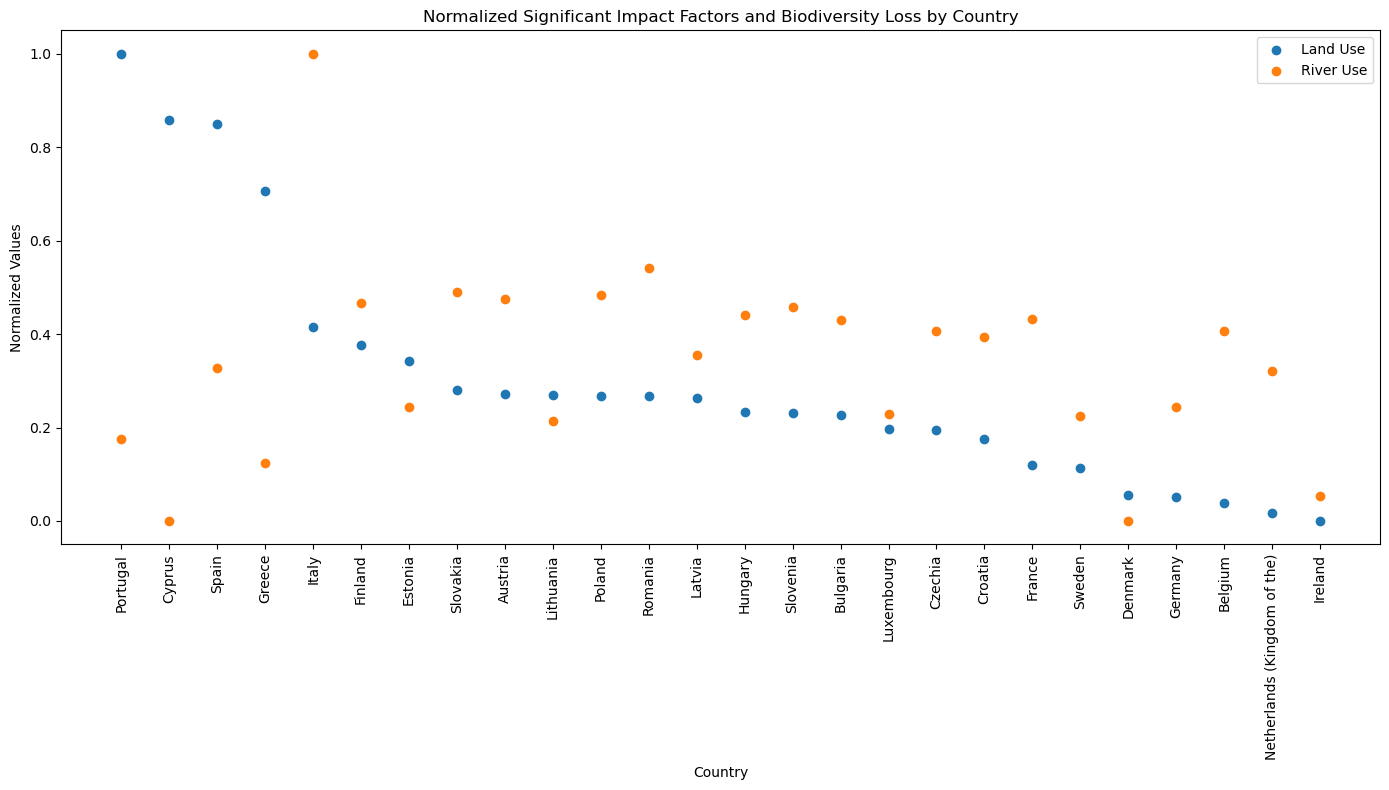

In [21]:
# Sort data 
agg_data_norm = agg_data_norm.sort_values(by='msa_land_use_static', ascending=False)

# Set up the matplotlib figure
plt.figure(figsize=(14, 8))

# Plot the normalized values of significant impact factors and biodiversity loss
plt.scatter(agg_data_norm['Area'], agg_data_norm['msa_land_use_static'], label='Land Use')
plt.scatter(agg_data_norm['Area'], agg_data_norm['msa_aquatic_land_use_river_static_cut'], label='River Use')

# Add titles and labels
plt.title('Normalized Significant Impact Factors and Biodiversity Loss by Country')
plt.xlabel('Country')
plt.ylabel('Normalized Values')
plt.xticks(rotation=90)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


/tmp/ipykernel_94789/3813902020.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


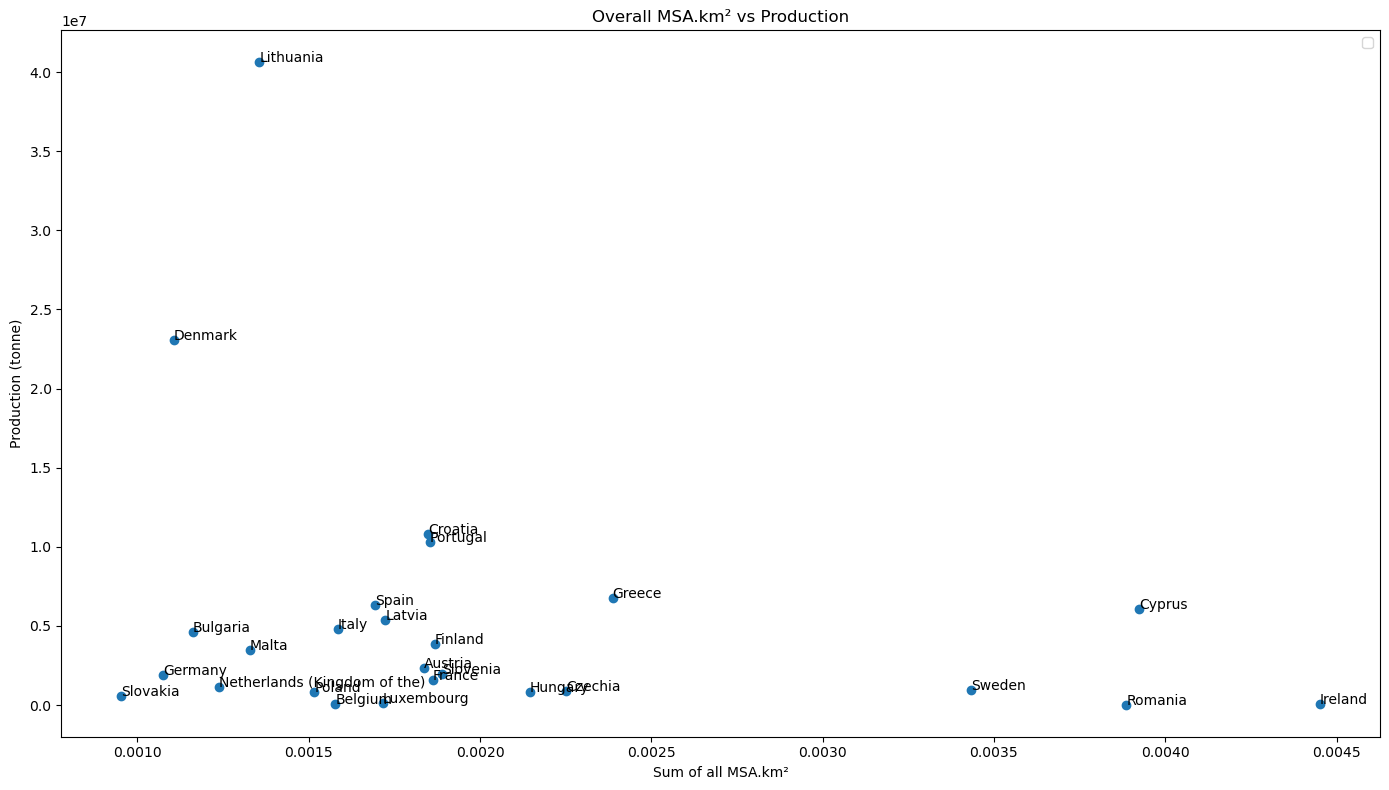

In [22]:
# Scatter plot to unveil good and bad producers
plt.figure(figsize=(14, 8))

# Divide Biodiversity loss by Value, to retrieve the sum of all MSA (to normalize by tons)
x = (biodiversity_loss_by_country['biodiversity_loss'] / biodiversity_loss_by_country['Value'])#.apply(lambda x: numpy.log10(x))
y = biodiversity_loss_by_country['Value']#.apply(lambda x: numpy.log10(x))

plt.scatter(x, y)


for i, txt in enumerate(biodiversity_loss_by_country['Area']):
    plt.annotate(txt, (x[i], y[i]))

# Add Titles and Labels
plt.title('Overall MSA.km² vs Production')
plt.xlabel('Sum of all MSA.km²')
plt.ylabel('Production (tonne)')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
